In [2]:
import pandas as pd
new_exp = pd.read_csv('new_exp.csv', index_col=0)  # index_col=0, it will use row index 


print(new_exp)


           ARF6      CD37      CD63      CD81       CD9    CHMP1A    CHMP1B  \
gene                                                                          
mac    0.003071 -0.308961  0.086942  0.950230  0.153502 -0.327946 -0.328770   
mac   -0.256319 -0.355557  0.263835  0.014558 -0.180090 -0.214662 -0.434431   
mac   -0.160895  4.718432 -0.238882 -0.237691  0.336274 -0.210500 -0.448578   
mac   -0.051195 -0.369537 -0.133891 -0.306991 -0.109503  1.729616  1.171384   
mac    0.688584 -0.934335 -0.047306 -0.146273 -0.038767  0.166152 -0.272879   
...         ...       ...       ...       ...       ...       ...       ...   
lamp5  0.228954 -0.497175  0.956658  0.327441 -0.429268 -0.360359 -0.462764   
lamp5 -0.064064 -0.469523  0.248471  0.321844  0.261888 -0.369083  0.944653   
lamp5 -0.338048  2.366839 -0.477125 -0.386651 -0.428588 -0.388953 -0.416858   
lamp5  0.071624 -0.387264  0.200631 -0.395090 -0.413160 -0.399745 -0.414664   
lamp5  0.195236  0.058672 -0.345404  0.369464  0.206

In [3]:
# Create a new column
new_exp['y'] = ''

# While creating the 'y' column, set the value as 'positive' for rows with 'macrophage' and 'negative' for rows with 'lamp5'
new_exp.loc[new_exp.index == 'mac', 'y'] = 'positive'
new_exp.loc[new_exp.index == 'lamp5', 'y'] = 'negative'


print(new_exp)


           ARF6      CD37      CD63      CD81       CD9    CHMP1A    CHMP1B  \
gene                                                                          
mac    0.003071 -0.308961  0.086942  0.950230  0.153502 -0.327946 -0.328770   
mac   -0.256319 -0.355557  0.263835  0.014558 -0.180090 -0.214662 -0.434431   
mac   -0.160895  4.718432 -0.238882 -0.237691  0.336274 -0.210500 -0.448578   
mac   -0.051195 -0.369537 -0.133891 -0.306991 -0.109503  1.729616  1.171384   
mac    0.688584 -0.934335 -0.047306 -0.146273 -0.038767  0.166152 -0.272879   
...         ...       ...       ...       ...       ...       ...       ...   
lamp5  0.228954 -0.497175  0.956658  0.327441 -0.429268 -0.360359 -0.462764   
lamp5 -0.064064 -0.469523  0.248471  0.321844  0.261888 -0.369083  0.944653   
lamp5 -0.338048  2.366839 -0.477125 -0.386651 -0.428588 -0.388953 -0.416858   
lamp5  0.071624 -0.387264  0.200631 -0.395090 -0.413160 -0.399745 -0.414664   
lamp5  0.195236  0.058672 -0.345404  0.369464  0.206

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import joblib

# Separate features and target variable
X = new_exp.iloc[:, :-1]
y = new_exp.iloc[:, -1]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Create and train the RandomForestClassifier model
rf_model = RandomForestClassifier(bootstrap=False)
rf_model.fit(X_train, y_train)

# Evaluate the performance of the model (optional)
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)


print("Test Score:", test_score)
joblib.dump(rf_model, 'random_forest_model_new_exp.pkl')


Test Score: 0.9997297297297297


['random_forest_model_new_exp.pkl']

In [7]:
rf_model.score(X_test,y_test)


0.9997297297297297

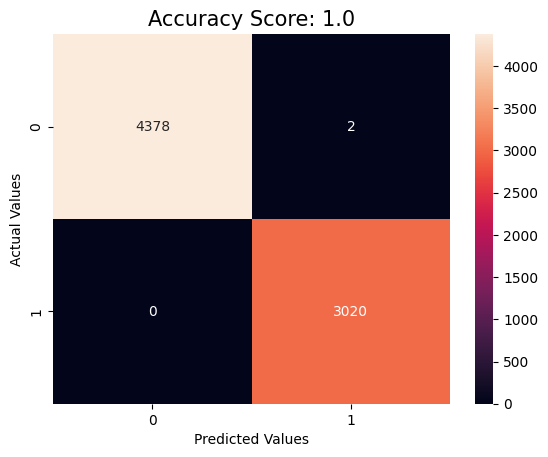

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on test data
predictions = rf_model.predict(X_test)

# Calculate accuracy score
score = round(accuracy_score(y_test, predictions), 3)

# Create confusion matrix
cm1 = confusion_matrix(y_test, predictions)

# Visualize confusion matrix with heatmap
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()



In [9]:
#  Predicting %votes on the test set
votes = rf_model.predict_proba(X_test)

# Creating a DataFrame containing %votes for each cell name
votes_df = pd.DataFrame(data=votes, columns=rf_model.classes_, index=X_test.index)

print(votes_df)

       negative  positive
gene                     
lamp5       1.0       0.0
mac         0.0       1.0
lamp5       1.0       0.0
lamp5       1.0       0.0
lamp5       1.0       0.0
...         ...       ...
lamp5       1.0       0.0
lamp5       1.0       0.0
lamp5       1.0       0.0
lamp5       1.0       0.0
lamp5       1.0       0.0

[7400 rows x 2 columns]
